### Hello World !  
This is my first attempt at learning machine-learning using python and as always I have started with the Iris dataset.
The tutorial referred can be found at:- https://machinelearningmastery.com/machine-learning-in-python-step-by-step/  

So the basic task at hand is to analyse the iris dataset and use the dataset to train some machine learning models.  
Once we have trained our model, we use the best model and run our validation/test data on this model and summarize the results.  
So let's get started.

# 1. Check your environment

It's always good to check what environment you are working in ! The below code checks the whether you have the necessary libraries installed in your environment and if everything is working as expected.

It imports each library required and prints the version.

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.4.3 |Continuum Analytics, Inc.| (default, Dec  1 2015, 11:39:45) [MSC v.1600 64 bit (AMD64)]
scipy: 0.19.1
numpy: 1.11.3
matplotlib: 2.0.0
pandas: 0.19.2
sklearn: 0.18.1


# 2. Load the Data

As you know we are going to use the "Iris" flowers dataset. It is the "HELLO WORLD" dataset of Data Science and Machine Learning.
The dataset contains 150 observations of iris flowers. 
There are 4 columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All flowers belong to one of the three species observed.

## 2.1 Import libraries

The below code imports all required modules,functions and objects.

In [2]:
# Load libraries
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 2.2 Load Dataset

We will use pandas to load our dataset into a dataframe. The read_csv function takes in the file name as parameter and loads it's content into a pandas dataframe. In this case the dataframe is "old_dataset".

In [23]:
old_dataset = pandas.read_csv("Iris.csv")

# 3. Summarizing the Dataset

Let's look at the data we just loaded !  
We will do the following to get an idea about the dataset we are dealing with:  
a. Dimensions of the dataset.  
b. Look at some of the rows in the dataset.  
c. Summary of all attributes in the dataset.  
d. Species-wise grouping of data

## 3.1 Dimensions of the Dataset

The shape property of a dataset shows you the number of rows and columns in the dataset. 

In [24]:
old_dataset.shape

(150, 6)

So we can say we are dealing with 150 observed instances of Iris flowers and have observed 6 attributes of each.

## 3.2 Looking at a few rows in the dataset

It's always a good practice to peek at your data before you actually start working with it. The head(n) function displays top n rows from the dataset.

In [25]:
# head
old_dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


As you can see in the above output we have 6 columns out of which "Id" column is not really required in further analysis.  
Since "Id" columns is not needed we create a new dataframe (named dataset) and select only the other 5 columns from the old_dataset.  
This will create a new datafame without the "Id" column.

In [40]:
# class distribution
dataset = old_dataset[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]]

## 3.3 Summary of attributes

The describe() function in pandas does this work for you !  
It lists out some statistical information about the data such as count, mean, minimum, standard deviation etc.


In [28]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3.4 Grouping by Species

Let's see how many species we have and how many flowers fall into each of those species.

In [30]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

So we know there are total 3 species and 50 instances of each under every species.

# 4. Visualization of Data

Here we will look at 2 types of plots:  
    1. Univariate (Single variable)  
    2. Multivariate (Multiple variables)

## 4.1 Univariate Plots

These are plots for single variable.  
We are creating Box and Whisker plots of each numeric type data in our dataset

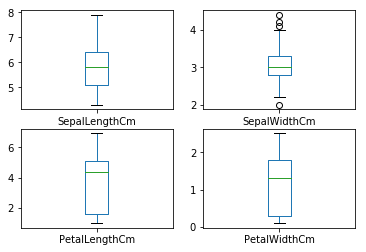

In [31]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

The above plots give an idea about the distribution of each of the attributes.  

Now let's plot some Histograms for each individual attribute.

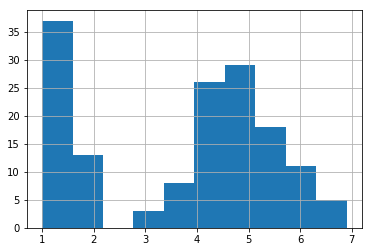

In [50]:
# histograms
petalLength = dataset['PetalLengthCm']
count,division = numpy.histogram(petalLength)
petalLength.hist(bins = division)
plt.show()

-------

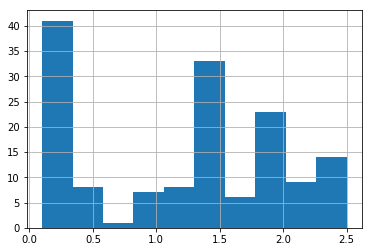

In [47]:
petalWidth = dataset['PetalWidthCm']
count,division = numpy.histogram(petalWidth)
petalWidth.hist(bins = division)
plt.show()

-----------

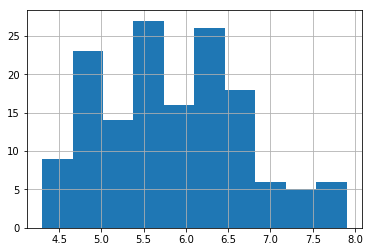

In [48]:
sepalLength = dataset["SepalLengthCm"]
count,division = numpy.histogram(sepalLength)
sepalLength.hist(bins=division)
plt.show()

-----

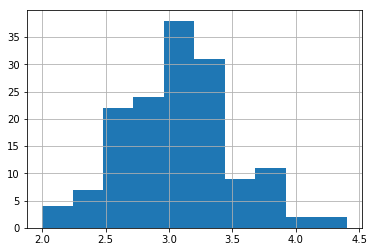

In [49]:
sepalWidth = dataset['SepalWidthCm']
count,division = numpy.histogram(sepalWidth)
sepalWidth.hist(bins = division)
plt.show()

Looks like "SepalLengthCm" and "SepalWidthCm" show a Gaussian Distribution. 

## 4.2 Multivariate Plots

Multivariate plots help us visualize relationship between attributes.  

First we will plot a Scatter Plot of the whole dataset. This is done using a Scatter Matrix.


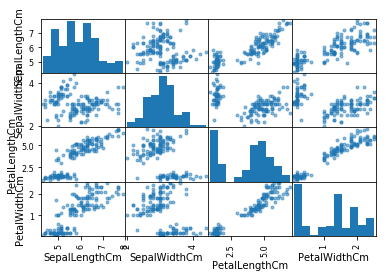

In [52]:
#scatter plot matrix
scatter_matrix(dataset)
plt.show()

# 5. Algorithmic Evaluation

Now we are going to create models of data and estimate their accuracy on new unseen data.  
Here is how we will proceed:  
1. Create a separate validation dataset.  
2. Setup the test harness to use 10-fold cross validation.
3. Build 5 different models to predict species from flower measurements.
4. Select the best model.

## 5.1 Creating the validation dataset

So here we will be splitting our dataset into 2 parts .  
One part will be used to train our model and the other part will be used as unseen data which will be used to estimate accuracy of our trained models.  

Let's do a 80-20 split where 80% of the dataset will be used to train our model and other 20% is used as unseen test data.

In [59]:
#splitting the dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Now our training data is in X_train and Y_train and our validation/test data is in X_validation and Y_validation.

## 5.2 Test Harness

We will be using 10-fold validation to estimate model accuracy.  
This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [60]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

"Accuracy" is the metric we are going to use to evaluate our models.  
The value for accuracy will be (Number of correctly predicted instances / Total instances) * 100 . This will give us accuracy in %.  
The "scoring" variable will be used when we build and evaluate the model.

## 5.3 Build Models

We will be evaluating 6 different algorithms. They are:  
    1. Logistic Regression - LR                     //Linear//
    2. Linear Discriminant Analysis - LDA           //Linear//
    3. K-Nearest neighbours - KNN                   //Non-Linear//
    4. Classification and Regression Trees - CART   //Non-Linear//
    5. Gaussian Naive Bayes - NB                    //Non-Linear//
    6. Support Vector Machines - SVM                //Non-Linear//  
    
We must reset the random number seed before each run so that the evaluation of each algorithm is done on exactly same data splits.  
Building and evaluating our 6 models below.

In [64]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

#Evaluate each model turn by turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    crossvalue_results = model_selection.cross_val_score(model ,X_train,Y_train, cv=kfold)
    results.append(crossvalue_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, crossvalue_results.mean(), crossvalue_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


## 5.4 Selecting the best model

As seen in output above we found accuracy estimations for each of the 6 algorithms.  
We need to select the most accurate one.  
It looks like SVM is the most accurate one.  

Let's visualize the accuracy comparison of these algorithms using a plot. This plot will show us spread of mean accuracy of each algorithm since we evaluate each algorithm 10 times using 10 fold evaluation.

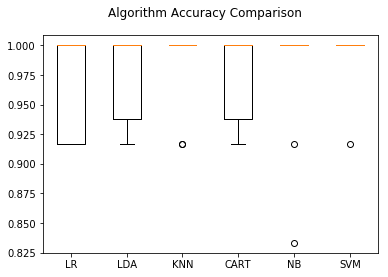

In [71]:
#Comparing algorithm accuracy
fig = plt.figure()
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6. Prediction Time

So , as we know SVM was the most accurate model that we tested.  
Now we check how this model acts on our validation/unseen data(20% split).  

A validation set always helps confirm the accuracy score furing training. It also helps just in case we made a mistake in training the model or any data leak occurred, in which case the results might not be as expected.  

We will run the SVM model directly on the validation/unseen dataset and summarize our results as :-   
    a. Accuracy score  
    b. Confusion matrix  
    c. Classification Report

In [76]:
# Make predictions on validation dataset
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.933333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



We can see that the accuracy is 0.93 or 93%. The confusion matrix shows that 3 errors were made.  
The classification report breaksdown each class based on precision,recall,f1-score and support.  


Let's run the 2nd most accurate model - KNN on the validation dataset.

In [73]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



Again we can see that the accuracy for KNN is 0.9 or 90%